<a href="https://colab.research.google.com/github/anisha99999/DNNs/blob/master/Assignment7_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization

% matplotlib inline
from keras.layers import Activation, Flatten, Dense, Dropout, Conv2D, Input, DepthwiseConv2D, Concatenate,Reshape
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils,plot_model
from keras import layers, models
from matplotlib import pyplot
from keras.utils import plot_model
import pandas as pd
import os
import cv2

from keras.preprocessing.image import img_to_array,array_to_img
from keras.preprocessing import image
from PIL import Image
from IPython.display import display

import tensorflow as tf
import tensorflow.keras.backend as K
#from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
#from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
(features, labels), (tst_features, tst_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))
print (train_features.shape)
from matplotlib import pyplot as plt
%matplotlib inline
#plt.imshow(train_features[1])
print(type(train_features))
train_features.shape
len(train_labels)

(50000, 32, 32, 3)
<class 'numpy.ndarray'>


50000

(50000, 32, 32, 3)
(50000, 32, 32, 3)
(50000, 32, 32, 3)
(50000, 32, 32, 3)
(50000, 32, 32, 3)
(50000, 32, 32, 3)
(50000, 32, 32, 3)
(50000, 32, 32, 3)
(50000, 32, 32, 3)
(50000, 32, 32, 3)


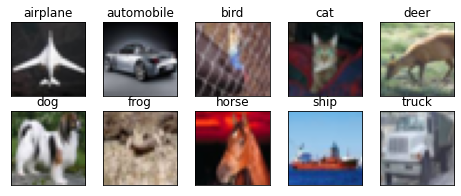

[(0, 'airplane'), (1, 'automobile'), (2, 'bird'), (3, 'cat'), (4, 'deer'), (5, 'dog'), (6, 'frog'), (7, 'horse'), (8, 'ship'), (9, 'truck')]


In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
heatmap_data=dict()
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
#for i in range(4):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    heatmap_data[class_names[i]] = train_features[idx]
    print(train_features.shape)
    plt.imshow(im)
plt.show()

classes=list(heatmap_data.keys())
print(list(enumerate(classes)))


In [4]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [5]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [6]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)
#print(np.array(train_features[1]))
#plt.imshow(train_features[2])
#pyplot.show()
#plt.imshow(train_features[1])
##plt.show()


In [7]:
# Define the model
def model_heatmap():
  model = Sequential()
  model.add(Convolution2D(48, 3, padding='same',input_shape=(32, 32, 3))) #32x32x48
  model.add(Activation('relu'))
  model.add(Convolution2D(48, 3)) #30x30x48
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2))) #15x15x48
  model.add(Dropout(0.25))

  model.add(Convolution2D(96, 3, padding='same')) #15x15x96
  model.add(Activation('relu'))
  model.add(Convolution2D(96, 3,)) #13x13x96
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2))) #6x6x96
  model.add(Dropout(0.25))

  model.add(Convolution2D(192, 3, padding='same')) #6x6x192
  model.add(Activation('relu'))
#model.add(Convolution2D(192, 3, 3)) 
#model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2))) #3x3x192
  model.add(Dropout(0.25))

#model.add(Convolution2D(192, 3, 3, padding='same')) #3x3x192
#model.add(Activation('relu'))
  model.add(Convolution2D(192, 3)) #1x1x192
  model.add(Activation('relu'))
  model.add(Dropout(0.25))
  model.add(Convolution2D(512, 1))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
#model.add(Convolution2D(256, 1))
#model.add(Activation('relu'))
  model.add(Flatten())
#model.add(Dense(512))
#model.add(Activation('relu'))
  model.add(Dropout(0.5))
#model.add(Dense(256))
#model.add(Activation('relu'))
#model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
# Compile the model
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  #print(model.summary ())
  return model
model1 = [model_heatmap (), model_heatmap ()]
model=model_heatmap ()
print(model1[0].summary ())
print(model.summary ())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 48)        1344      
_________________________________________________________________
activation (Activation)      (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 48)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 96)        4

In [8]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
#model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
#                                 samples_per_epoch = train_features.shape[0], nb_epoch = 80, 
#                                 validation_data = (test_features, test_labels), verbose=1)

model_info = model1[0].fit(datagen.flow(train_features, train_labels, batch_size = 128),
                                 steps_per_epoch = None, epochs = 40, 
                                 validation_data = (test_features, test_labels), verbose=1)

end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
#plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model1[0]))


Epoch 1/40
391/391 [==============================] - 8s 21ms/step - loss: 1.8564 - accuracy: 0.2929 - val_loss: 1.3818 - val_accuracy: 0.4914
Epoch 2/40
391/391 [==============================] - 7s 19ms/step - loss: 1.3567 - accuracy: 0.5104 - val_loss: 1.1595 - val_accuracy: 0.5836
Epoch 3/40
391/391 [==============================] - 8s 20ms/step - loss: 1.1511 - accuracy: 0.5961 - val_loss: 0.9851 - val_accuracy: 0.6604
Epoch 4/40
391/391 [==============================] - 8s 19ms/step - loss: 1.0166 - accuracy: 0.6468 - val_loss: 0.8581 - val_accuracy: 0.7027
Epoch 5/40
391/391 [==============================] - 8s 20ms/step - loss: 0.9222 - accuracy: 0.6812 - val_loss: 0.7901 - val_accuracy: 0.7276
Epoch 6/40
391/391 [==============================] - 8s 20ms/step - loss: 0.8553 - accuracy: 0.7072 - val_loss: 0.7532 - val_accuracy: 0.7397
Epoch 7/40
391/391 [==============================] - 8s 20ms/step - loss: 0.8019 - accuracy: 0.7265 - val_loss: 0.7118 - val_accuracy: 0.7534

In [9]:

import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from keras.preprocessing.image import img_to_array,array_to_img
from keras.preprocessing import image
from PIL import Image
from IPython.display import display

# %matplotlib inline

def heat_map (orig):

  def heatmap_gen(orig, intensity=0.25, res=250):
  
    x = orig.astype('float32')/255
    print(x.shape)
    #x=tf.expand_dims(x,0)
    #x = np.expand_dims(x, axis=-1)
  #x = preprocess_input(x)
    preds = model.predict(x)
    class_idx = np.argmax(preds[0])
    class_out = model.output[:, class_idx]
    print(class_out.shape)
    with tf.GradientTape() as tape:
      last_conv_layer = model1[0].get_layer('conv2d_4')
      grads = tape.gradient(class_out, last_conv_layer.output)
      pooled_grads = K.mean(grads, axis=(0, 1, 2))
      iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
      print(model.inputs)
      print(model.output)
      print(last_conv_layer.shape)
      model_out, conv_layer_out = iterate([x])
      print(grads.shape)    
      print(pooled_grads.shape)  
  #print(heatmap.shape)    
    for i in range(192):
      conv_layer_out[:, :, i] *= model_out[i]
      heatmap = np.mean(conv_layer_out, axis=-1)
      heatmap = np.maximum(heatmap, 0)
      heatmap /= np.max(heatmap)
      heatmap = heatmap.reshape((6, 6))
    return heatmap
  #img = cv2.imread(orig)

  #return orig
 # cv2_imshow(cv2.resize(cv2.imread(orig), (res, res)))
#  cv2_imshow(cv2.resize(img, (res, res)))

  classes = list (heatmap_data.keys ())
  fig = plt.figure(figsize=(8,3))
  for i in range(4):
    ax = fig.add_subplot(1, 4, 1 + i, xticks=[], yticks=[])
    im = heatmap_data[classes[i]][0]
    ax.set_title(classes[i])
    #for_heatmap_plot[ class_names[i] ] = train_features[idx]
    plt.imshow(im)  
  plt.show()

  fig = plt.figure(figsize=(8,3))
  for i in range(4):
    ax = fig.add_subplot(1, 4, 1 + i, xticks=[], yticks=[])
    im = heatmap_data[classes[i]][0]
    h1=heatmap_gen(heatmap_data[classes[i]])
    ax.set_title('heatmap')   
    heatmap = cv2.resize(h1, (im.shape[0], im.shape[1]))
    heatmap = np.uint8(255*heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.set_title ('resized heatmap')
    plt.imshow(heatmap)
  plt.show()



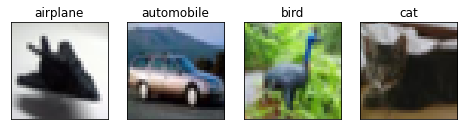

(5000, 32, 32, 3)
(None,)


AttributeError: ignored

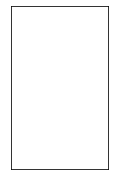

In [10]:
heat_map (heatmap_data)